In [13]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access files in Google Drive
file_path1 = '/content/drive/MyDrive/42_District_wise_crimes_committed_against_women_2001_2012.csv'
#/content/drive/MyDrive/42_District_wise_crimes_committed_against_women_2001_2012.csv
file_path2 = '/content/drive/MyDrive/42_District_wise_crimes_committed_against_women_2013 (1).csv'
#/content/drive/MyDrive/42_District_wise_crimes_committed_against_women_2013 (1).csv
file_path3 = '/content/drive/MyDrive/42_District_wise_crimes_committed_against_women_2014.csv'
#/content/drive/MyDrive/42_District_wise_crimes_committed_against_women_2014.csv

Mounted at /content/drive


In [ ]:
# Load the datasets
data_2001_2012 = pd.read_csv(file_path1)
data_2013  = pd.read_csv(file_path2)
data_2014 = pd.read_csv(file_path3)

In [14]:
#Load the datasets w link (simran)
data_2001_2012 = pd.read_csv('/content/42_District_wise_crimes_committed_against_women_2014.csv')
data_2013  = pd.read_csv('/content/42_District_wise_crimes_committed_against_women_2013(1).csv')
data_2014 = pd.read_csv('/content/42_District_wise_crimes_committed_against_women_2014.csv')

In [15]:
# Concatenate the datasets
combined_df = pd.concat([data_2001_2012, data_2013 , data_2014], ignore_index=True)

# Display the combined DataFrame
print("Combined dataset:")
print(combined_df.head())

# Check for missing values
print("\nMissing values:")
print(combined_df.isnull().sum())

# Check data types
print("\nData types:")
print(combined_df.dtypes)


Combined dataset:
         STATE/UT          DISTRICT  Year  Rape  Custodial Rape  \
0  ANDHRA PRADESH         ANANTAPUR  2014    35             0.0   
1  ANDHRA PRADESH          CHITTOOR  2014    32             0.0   
2  ANDHRA PRADESH          CUDDAPAH  2014    28             0.0   
3  ANDHRA PRADESH     EAST GODAVARI  2014    85             0.0   
4  ANDHRA PRADESH  GUNTAKAL RAILWAY  2014     0             0.0   

   Custodial_Gang Rape  Custodial_Other Rape  Rape other than Custodial  \
0                  0.0                   0.0                       35.0   
1                  0.0                   0.0                       32.0   
2                  0.0                   0.0                       28.0   
3                  0.0                   0.0                       85.0   
4                  0.0                   0.0                        0.0   

   Rape_Gang Rape  Rape_Others  ...  ITP Under Section 5  ITP Under Section 6  \
0             0.0         35.0  ...            

In [16]:
combined_df

,STATE/UT,DISTRICT,Year,Rape,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,Rape_Gang Rape,Rape_Others,...,ITP Under Section 5,ITP Under Section 6,ITP Under Section 7,ITP Under Section 8,ITP Under Other Sections,Other SLL Crimes against Women,Total Crimes against Women,Kidnapping and Abduction,Insult to modesty of Women,Importation of Girls
0,ANDHRA PRADESH,ANANTAPUR,2014,35,0.0,0.0,0.0,35.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1097.0,NaN,NaN,NaN
1,ANDHRA PRADESH,CHITTOOR,2014,32,0.0,0.0,0.0,32.0,1.0,31.0,...,4.0,0.0,0.0,0.0,0.0,0.0,607.0,NaN,NaN,NaN
2,ANDHRA PRADESH,CUDDAPAH,2014,28,0.0,0.0,0.0,28.0,0.0,28.0,...,0.0,0.0,0.0,0.0,5.0,0.0,609.0,NaN,NaN,NaN
3,ANDHRA PRADESH,EAST GODAVARI,2014,85,0.0,0.0,0.0,85.0,0.0,85.0,...,0.0,0.0,0.0,0.0,16.0,0.0,1277.0,NaN,NaN,NaN
4,ANDHRA PRADESH,GUNTAKAL RAILWAY,2014,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,LAKSHADWEEP,LAKSHADWEEP,2014,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN
2493,LAKSHADWEEP,TOTAL,2014,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN
2494,PUDUCHERRY,KARAIKAL,2014,3,0.0,0.0,0.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,NaN,NaN,NaN
2495,PUDUCHERRY,PUDUCHERRY,2014,7,1.0,0.0,1.0,6.0,1.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,83.0,NaN,NaN,NaN


In [17]:
combined_df.shape

(2497, 65)

In [18]:
# Define a threshold (e.g., 50%) for the percentage of missing values
threshold = 0.5
columns_to_drop = combined_df.columns[combined_df.isnull().mean() > threshold]
combined_df.drop(columns=columns_to_drop, inplace=True)

In [19]:
combined_df

,STATE/UT,DISTRICT,Year,Rape,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,Rape_Gang Rape,Rape_Others,...,"Commission of Sati Prevention Act, 1987","Protection of Women from Domestic Violence Act, 2005",Immoral Traffic Prevention Act,ITP Under Section 5,ITP Under Section 6,ITP Under Section 7,ITP Under Section 8,ITP Under Other Sections,Other SLL Crimes against Women,Total Crimes against Women
0,ANDHRA PRADESH,ANANTAPUR,2014,35,0.0,0.0,0.0,35.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1097.0
1,ANDHRA PRADESH,CHITTOOR,2014,32,0.0,0.0,0.0,32.0,1.0,31.0,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,607.0
2,ANDHRA PRADESH,CUDDAPAH,2014,28,0.0,0.0,0.0,28.0,0.0,28.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,609.0
3,ANDHRA PRADESH,EAST GODAVARI,2014,85,0.0,0.0,0.0,85.0,0.0,85.0,...,0.0,0.0,16.0,0.0,0.0,0.0,0.0,16.0,0.0,1277.0
4,ANDHRA PRADESH,GUNTAKAL RAILWAY,2014,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,LAKSHADWEEP,LAKSHADWEEP,2014,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2493,LAKSHADWEEP,TOTAL,2014,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2494,PUDUCHERRY,KARAIKAL,2014,3,0.0,0.0,0.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
2495,PUDUCHERRY,PUDUCHERRY,2014,7,1.0,0.0,1.0,6.0,1.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0


In [20]:
combined_df.to_csv('cleaned_data.csv',index=True)

In [ ]:
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
data=pd.read_csv("/content/cleaned_data.csv")

In [25]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [26]:
data

,Unnamed: 0,STATE OR UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her Modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001-01-01,50,30.0,16,149,34.0,175,0.0
1,1,ANDHRA PRADESH,ANANTAPUR,2001-01-01,23,30.0,7,118,24.0,154,0.0
2,2,ANDHRA PRADESH,CHITTOOR,2001-01-01,27,34.0,14,112,83.0,186,0.0
3,3,ANDHRA PRADESH,CUDDAPAH,2001-01-01,20,20.0,17,126,38.0,57,0.0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001-01-01,23,26.0,12,109,58.0,247,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10672,10672,LAKSHADWEEP,LAKSHADWEEP,2014-01-01,1,NaN,0,1,NaN,0,NaN
10673,10673,LAKSHADWEEP,TOTAL,2014-01-01,1,NaN,0,1,NaN,0,NaN
10674,10674,PUDUCHERRY,KARAIKAL,2014-01-01,3,NaN,0,12,NaN,1,NaN
10675,10675,PUDUCHERRY,PUDUCHERRY,2014-01-01,7,NaN,1,20,NaN,3,NaN



To forecast crimes for each state or district and also forecast the number of each crime for each state or district, we can use a multi-output regression approach

Data Preparation:

Target Variable: Instead of a single "crime rate," we create a new target variable representing the total number of crimes against women per year in each district. We can achieve this by summing the values in columns like "Rape," "Kidnapping and Abduction," etc.
State/UT and District: These can be categorical features representing the location. One-hot encoding is a common technique to convert these into numerical features suitable for XGBoost.
Year: This can be used directly as a numerical feature representing time.

In [27]:
print(data.columns)

Index(['Unnamed: 0', 'STATE OR UT', 'DISTRICT', 'Year', 'Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on Women with intent to outrage her Modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')


In [28]:
#Our model aims to predict the total number of crimes against women per year in each district. This requires data at the district level.

# TargetVariable (total crimes against women per year)
data["Total_Crimes"] = data[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                 'Assault on Women with intent to outrage her Modesty',
                 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                 'Importation of Girls']].sum(axis=1)

# One-hot encode categorical features (STATE OR UT, DISTRICT)
data = pd.get_dummies(data, columns=["STATE OR UT", "DISTRICT"])

# Year as numerical feature
year = data["Year"]

In [29]:
#DISTRICT LEVEL ANALYSIS

# Separating features and target variable
x = data.drop(columns=["Total_Crimes", "Year"])
y = data["Total_Crimes"]

In [30]:
x_filled = x.fillna(0)

In [31]:
x_filled.shape

(10677, 995)

In [32]:
y_filled = y.fillna(0)

In [33]:
y_filled.shape

(10677,)

In [ ]:
data

In [35]:
# Split data into training and testing sets (e.g., 80%/20%)
x_train, x_test, y_train, y_test = train_test_split(x_filled, y_filled, test_size=0.2)

DEEP NEURAL NETWORK

In [36]:
X_train=x_train.T
X_test=x_test.T

In [37]:
X_train.shape

(995, 8541)

In [38]:
X_test.shape

(995, 2136)

In [39]:
Y_train=np.array(y_train).reshape(1,-1)
y_train = np.squeeze(y_train)  # Remove the singleton dimension
Y_test=np.array(y_test).reshape(1,-1)

In [40]:
Y_train.shape

(1, 8541)

In [41]:
Y_test.shape

(1, 2136)

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# Defining model
model = Sequential()

# Adding input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(8541,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Adding output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Printing model summary
model.summary()

start_time=time.time()

# Training the model
history_dnn = model.fit(X_train, Y_train.T, epochs=10, batch_size=32, validation_split=0.2)
cputime=time.time()-start_time
# Predict on the training set
y_pred_train = model.predict(X_train).squeeze()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                546688    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 549313 (2.10 MB)
Trainable params: 549313 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 2s 32ms/step - loss: 4906633.5000 - mse: 4906633.5000 - val_loss: 636452.8125 - val_mse: 636452.8125

In [43]:
cputime

5.80010461807251

In [44]:
from sklearn.metrics import r2_score
# Trimming Y_train.squeeze() to match the length of y_pred_train
Y_train_trimmed = Y_train.squeeze()[:len(y_pred_train)]

# R-squared score on training set
r2_train = r2_score(Y_train_trimmed, y_pred_train)
print(f"R-squared on training set: {r2_train}")

from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE on training set
rmse_train = np.sqrt(mean_squared_error(Y_train_trimmed, y_pred_train))
print(f"Root Mean Squared Error (RMSE) on training set: {rmse_train}")


R-squared on training set: -0.06294916810093176
Root Mean Squared Error (RMSE) on training set: 2012.9898681640625


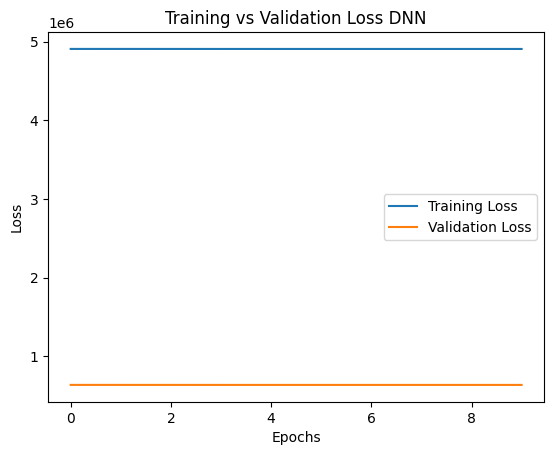

In [45]:
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss DNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestRegressor
# Initializing lists to store training and validation errors
train_errors_rf = []
val_errors_rf = []

tree_counts = [10, 50, 100, 200, 500]

for n_trees in tree_counts:
    # Creating a Random Forest regressor
    model = RandomForestRegressor(n_estimators=n_trees, random_state=42)
    start_time=time.time()
    # Training the model
    model.fit(x_train, y_train)
    cputime=time.time()-start_time
    # Calculating training error
    y_train_pred = model.predict(x_train)
    train_error = np.sqrt(np.mean((y_train_pred - y_train) ** 2))  # RMSE
    train_errors_rf.append(train_error)

    # Calculating validation error
    y_val_pred = model.predict(x_test)
    val_error = np.sqrt(np.mean((y_val_pred - y_test) ** 2))  # RMSE
    val_errors_rf.append(val_error)

In [47]:
cputime

160.58689165115356

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
r2 = r2_score(y_test, y_val_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 311.94738223311276
R-squared: 0.969998591554101


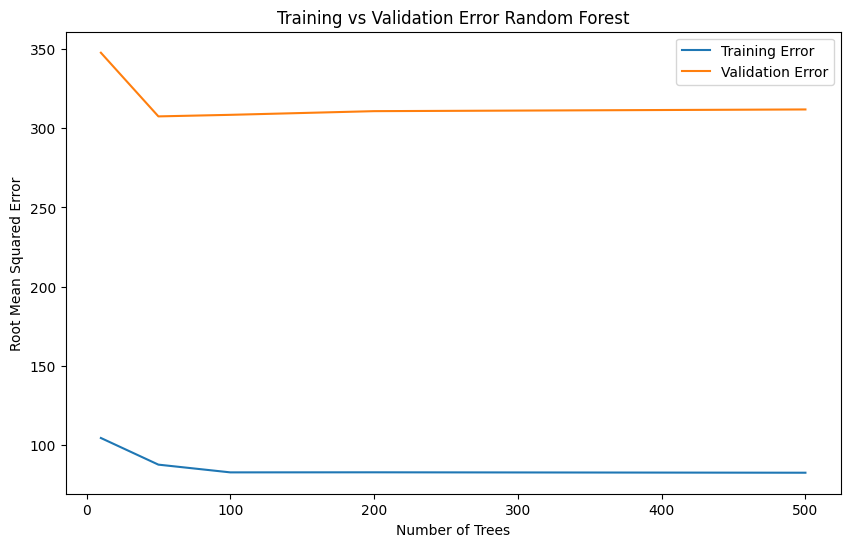

In [49]:
# Plot training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(tree_counts, train_errors_rf, label='Training Error')
plt.plot(tree_counts, val_errors_rf, label='Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('Root Mean Squared Error')
plt.title('Training vs Validation Error Random Forest')
plt.legend()
plt.show()



GRADIENT BOOST

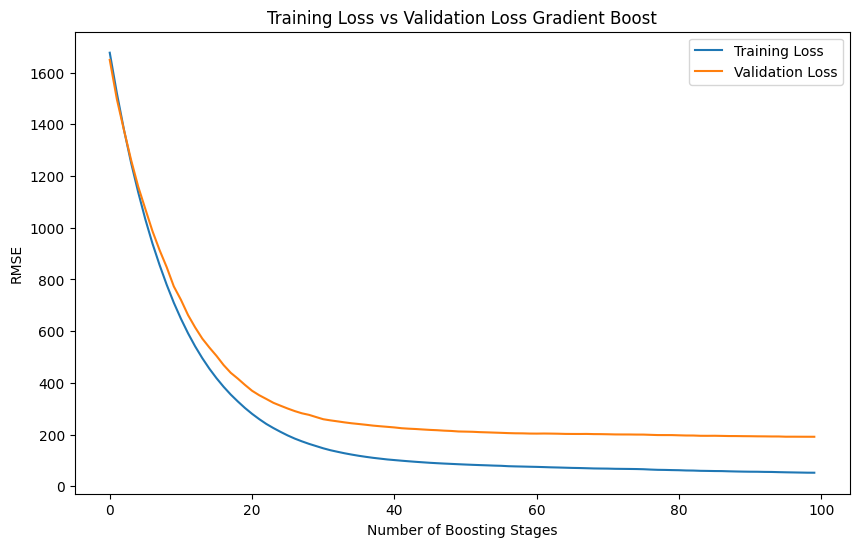

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
start_time=time.time()
# Fit the model to the training data
gb_regressor.fit(x_train, y_train)
cputime=time.time()-start_time
# Get staged predictions on the training data
train_loss_gd = []
for y_pred in gb_regressor.staged_predict(x_train):
    train_loss_gd.append(np.sqrt(mean_squared_error(y_train, y_pred)))

# Get staged predictions on the validation data
val_loss_gd = []
for y_pred_val in gb_regressor.staged_predict(x_test):
    val_loss_gd.append(np.sqrt(mean_squared_error(y_test, y_pred_val)))


# Plot training loss graph
plt.figure(figsize=(10, 6))
plt.plot(train_loss_gd, label='Training Loss')
plt.plot(val_loss_gd, label='Validation Loss')
plt.xlabel('Number of Boosting Stages')
plt.ylabel('RMSE')
plt.title('Training Loss vs Validation Loss Gradient Boost')
plt.legend()
plt.show()

# Make predictions on the test data
predictions = gb_regressor.predict(x_test)

In [51]:
cputime

13.604953289031982

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 191.42244466545742
R-squared: 0.9887029599293299


TRANSFORMER

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Define numerical features
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns

# Define categorical features
categorical_features = x.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=min(10, len(numeric_features))))
    # Adjusted to use the minimum of 10 or the number of numeric features
])


# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])
start_time=time.time()

# Fit the pipeline on training data
history_t=pipeline.fit(x_train, y_train)
cputime=time.time()-start_time

# Predict on test data
predictions = pipeline.predict(x_test)


In [54]:
cputime

8.851646423339844

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test,predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 220.16211858009976
R-squared: 0.9850560934192372


GRU

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Convert data to float32
x_train_gru = x_train.astype(np.float32)
x_test_gru = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Reshape data for GRU input
x_train_gru = x_train_gru.values.reshape(x_train_gru.shape[0], 1, x_train_gru.shape[1])
x_test_gru = x_test_gru.values.reshape(x_test_gru.shape[0], 1, x_test_gru.shape[1])

# Define the GRU model
model = Sequential([
    GRU(units=64, input_shape=(1, x_train_gru.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
start_time=time.time()

# Train the model
history_gru = model.fit(x_train_gru, y_train, epochs=50, batch_size=32, validation_data=(x_test_gru, y_test))
cputime=time.time()-start_time
# Evaluate the model
loss = model.evaluate(x_test_gru, y_test)
print("Test Loss:", loss)

# Predict on test data
predictions = model.predict(x_test_gru)

Epoch 1/50
267/267 [==============================] - 5s 9ms/step - loss: 3653135.2500 - val_loss: 3487316.2500
Epoch 2/50
267/267 [==============================] - 2s 8ms/step - loss: 3637673.5000 - val_loss: 3471651.0000
Epoch 3/50
267/267 [==============================] - 3s 11ms/step - loss: 3624071.2500 - val_loss: 3457522.0000
Epoch 4/50
267/267 [==============================] - 2s 9ms/step - loss: 3611697.5000 - val_loss: 3444942.7500
Epoch 5/50
267/267 [==============================] - 2s 7ms/step - loss: 3600452.0000 - val_loss: 3433509.7500
Epoch 6/50
267/267 [==============================] - 2s 7ms/step - loss: 3590050.0000 - val_loss: 3422739.0000
Epoch 7/50
267/267 [==============================] - 2s 7ms/step - loss: 3580349.0000 - val_loss: 3412511.7500
Epoch 8/50
267/267 [==============================] - 2s 7ms/step - loss: 3570883.7500 - val_loss: 3402810.0000
Epoch 9/50
267/267 [==============================] - 2s 9ms/step - loss: 3561356.5000 - val_loss: 3392

In [57]:
cputime

112.81991910934448

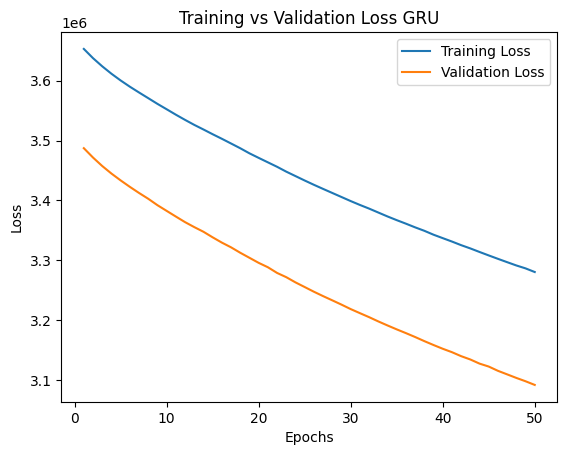

In [58]:
train_loss_gru=history_gru.history['loss']
val_loss_gru=history_gru.history['val_loss']
plt.plot(range(1,51),train_loss_gru,label='Training Loss')
plt.plot(range(1,51),val_loss_gru,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss GRU')
plt.show()

In [59]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 1758.3681640625
R-squared: 0.046768060617606855


RNN


In [61]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalizing the features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshaping the input data to be 3-dimensional for LSTM input
# Assuming the input shape is (samples, time steps, features)
# Here, we consider each district's crime data for each year as a sequence
# and time steps are the number of years
x_train_reshaped = np.reshape(x_train_scaled, (x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_reshaped = np.reshape(x_test_scaled, (x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, x_train_scaled.shape[1])))
model.add(Dense(units=1))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')
start_time=time.time()
# Training the model
history_rnn=model.fit(x_train_reshaped, y_train, epochs=50, batch_size=32)
cputime=time.time()-start_time
# Evaluating the model
loss = model.evaluate(x_test_reshaped, y_test)
print("Test Loss:", loss)

# Making predictions
predictions = model.predict(x_test_reshaped)

Epoch 1/50
267/267 [==============================] - 4s 7ms/step - loss: 3658454.5000
Epoch 2/50
267/267 [==============================] - 3s 12ms/step - loss: 3647241.2500
Epoch 3/50
267/267 [==============================] - 2s 7ms/step - loss: 3634016.0000
Epoch 4/50
267/267 [==============================] - 2s 7ms/step - loss: 3622794.5000
Epoch 5/50
267/267 [==============================] - 2s 7ms/step - loss: 3613117.7500
Epoch 6/50
267/267 [==============================] - 2s 6ms/step - loss: 3604517.7500
Epoch 7/50
267/267 [==============================] - 2s 7ms/step - loss: 3596665.0000
Epoch 8/50
267/267 [==============================] - 2s 7ms/step - loss: 3589288.0000
Epoch 9/50
267/267 [==============================] - 3s 13ms/step - loss: 3582313.2500
Epoch 10/50
267/267 [==============================] - 3s 13ms/step - loss: 3575696.2500
Epoch 11/50
267/267 [==============================] - 3s 10ms/step - loss: 3569316.2500
Epoch 12/50
267/267 [================

In [62]:
cputime

143.94007563591003

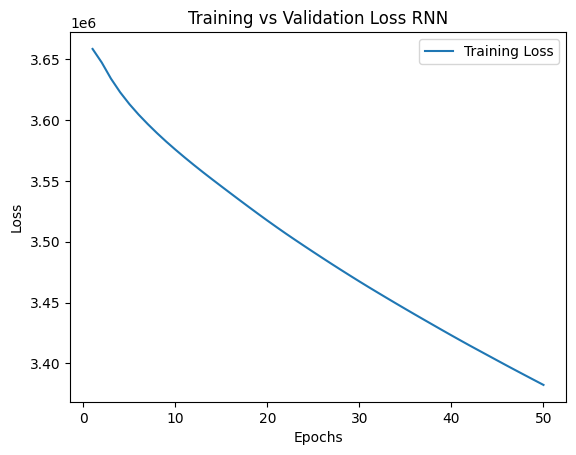

In [63]:
train_loss_rnn=history_rnn.history['loss']
plt.plot(range(1,51),train_loss_rnn,label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss RNN')
plt.show()

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 1789.740234375
R-squared: 0.012450333559764548


LSTM

In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert input arrays to NumPy arrays with float data type
x_train_reshaped = np.array(x_train, dtype=np.float32)
x_test_reshaped = np.array(x_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Reshape the input data to be 3-dimensional [samples, timesteps, features]
# Here, we set the number of timesteps to 1 since each sample represents data for a single year
# and the features will remain unchanged
x_train_reshaped = np.reshape(x_train_reshaped, (x_train_reshaped.shape[0], 1, x_train_reshaped.shape[1]))
x_test_reshaped = np.reshape(x_test_reshaped, (x_test_reshaped.shape[0], 1, x_test_reshaped.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, x_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')
start_time=time.time()
# Train the model
history_lstm=model.fit(x_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test_reshaped, y_test))
cputime=time.time()-start_time
# Evaluate the model
loss = model.evaluate(x_test_reshaped, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(x_test_reshaped)

Epoch 1/50
267/267 [==============================] - 6s 10ms/step - loss: 3655510.0000 - val_loss: 3492911.0000
Epoch 2/50
267/267 [==============================] - 3s 13ms/step - loss: 3645715.7500 - val_loss: 3482685.0000
Epoch 3/50
267/267 [==============================] - 2s 7ms/step - loss: 3636674.0000 - val_loss: 3472959.2500
Epoch 4/50
267/267 [==============================] - 2s 7ms/step - loss: 3628036.7500 - val_loss: 3464495.2500
Epoch 5/50
267/267 [==============================] - 3s 11ms/step - loss: 3620395.0000 - val_loss: 3456607.7500
Epoch 6/50
267/267 [==============================] - 3s 11ms/step - loss: 3613183.5000 - val_loss: 3449059.7500
Epoch 7/50
267/267 [==============================] - 2s 8ms/step - loss: 3606295.5000 - val_loss: 3441828.2500
Epoch 8/50
267/267 [==============================] - 2s 8ms/step - loss: 3599652.5000 - val_loss: 3434870.7500
Epoch 9/50
267/267 [==============================] - 2s 7ms/step - loss: 3593257.2500 - val_loss: 3

In [66]:
cputime

144.88701367378235

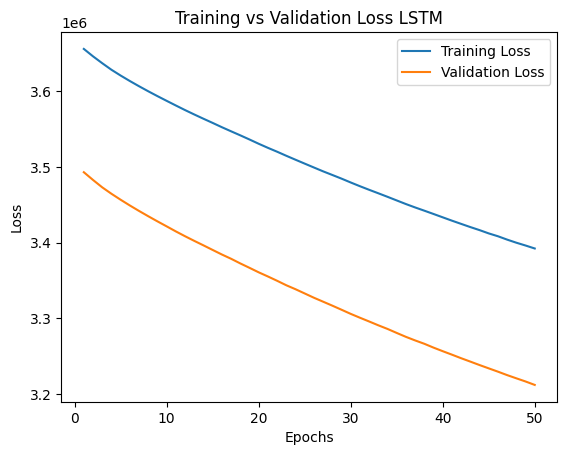

In [67]:
train_loss_lstm=history_lstm.history['loss']
val_loss_lstm=history_lstm.history['val_loss']
plt.plot(range(1,51),train_loss_lstm,label='Training Loss')
plt.plot(range(1,51),val_loss_lstm,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss LSTM')
plt.show()



In [68]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 1792.3148193359375
R-squared: 0.009607025549953296


XGBOOST


In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

start_time=time.time()

# Define XGBoost model parameters (adjust as needed)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5,eval_metric='rmse')

# Train the model and track the evaluation metrics
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=False)
cputime=time.time()-start_time

In [70]:
cputime

8.771351099014282

In [71]:
# Make predictions on the testing set
y_pred = model.predict(x_test)

# Calculate evaluation metrics (R2 and Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 245.9806365966797
R-squared: 0.9813456202652138


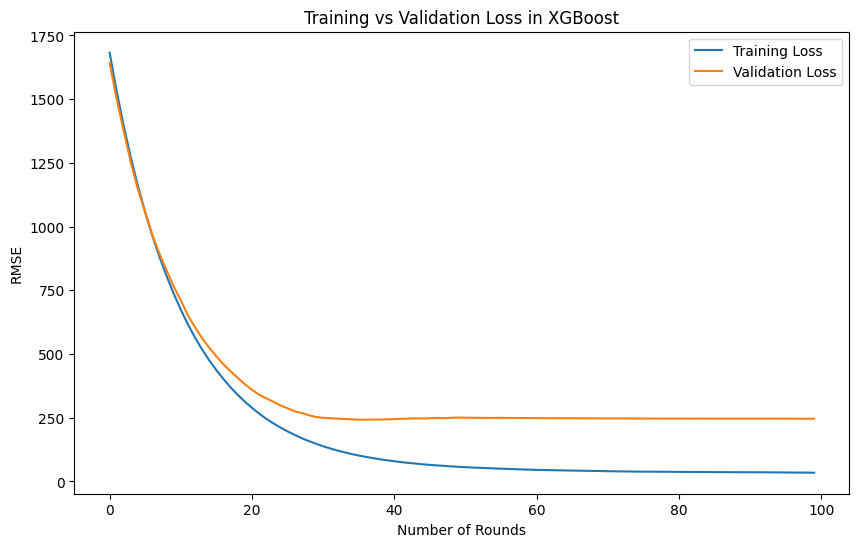

In [72]:
# Get the training and validation loss
results = model.evals_result()
train_loss_XGBoost = results['validation_0']['rmse']
val_loss_XGBoost = results['validation_1']['rmse']

# Plot the training loss graph
plt.figure(figsize=(10, 6))
plt.plot(train_loss_XGBoost, label='Training Loss')
plt.plot(val_loss_XGBoost, label='Validation Loss')
plt.xlabel('Number of Rounds')
plt.ylabel('RMSE')
plt.title('Training vs Validation Loss in XGBoost')
plt.legend()
plt.show()

FORECASTING WITH 2015 DATA

In [73]:
data_2015 = pd.read_csv('/content/2015_data_preprocessed(to be used in forecasting).csv')


In [74]:
data_2015

,Unnamed: 0,STATE OR UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her Modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ANANTAPUR,2015,32,57,12,325,8,276,0
1,1,ANDHRA PRADESH,CHITTOOR,2015,31,20,10,94,1,202,0
2,2,ANDHRA PRADESH,CUDDAPAH,2015,34,17,6,211,82,317,0
3,3,ANDHRA PRADESH,EAST GODAVARI,2015,104,25,13,574,150,522,0
4,4,ANDHRA PRADESH,GUNTAKAL RAILWAY,2015,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
847,847,LAKSHADWEEP,LAKSHADWEEP,2015,0,0,0,6,1,2,0
848,848,LAKSHADWEEP,TOTAL DISTRICT(S),2015,0,0,0,6,1,2,0
849,849,PUDUCHERRY,KARAIKAL,2015,0,1,0,8,3,0,0
850,850,PUDUCHERRY,PUDUCHERRY,2015,3,13,1,25,7,4,0


In [75]:
missing_features = [col for col in data_2015.columns if col not in list(data_2015.columns)]

# Drop missing features from unseen data
data_2015_modified = data_2015.drop(missing_features, axis=1)


In [76]:
data_2015_modified

,Unnamed: 0,STATE OR UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her Modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ANANTAPUR,2015,32,57,12,325,8,276,0
1,1,ANDHRA PRADESH,CHITTOOR,2015,31,20,10,94,1,202,0
2,2,ANDHRA PRADESH,CUDDAPAH,2015,34,17,6,211,82,317,0
3,3,ANDHRA PRADESH,EAST GODAVARI,2015,104,25,13,574,150,522,0
4,4,ANDHRA PRADESH,GUNTAKAL RAILWAY,2015,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
847,847,LAKSHADWEEP,LAKSHADWEEP,2015,0,0,0,6,1,2,0
848,848,LAKSHADWEEP,TOTAL DISTRICT(S),2015,0,0,0,6,1,2,0
849,849,PUDUCHERRY,KARAIKAL,2015,0,1,0,8,3,0,0
850,850,PUDUCHERRY,PUDUCHERRY,2015,3,13,1,25,7,4,0


In [77]:
# Get the expected feature order from the model (assuming available)
expected_order = data.columns

# Reorder columns in new data to match expected order
data_2015_modified_reordered = data_2015_modified.reindex(columns=expected_order)
# # Remove unnecessary features
data_2015_modified_reduced = data_2015_modified_reordered.drop(columns=['Total_Crimes','Year'])

predicted_crime_rates = model.predict(data_2015_modified_reduced)

In [78]:

# Print the predictions
print("Predicted crime rates for new districts:")
for i, district in enumerate(data_2015_modified['DISTRICT']):
  print(f"District: {district}, Predicted Crime Rate: {predicted_crime_rates[i]:.2f} crimes per 100,000 people")  # Format prediction with 2 decimal places

Predicted crime rates for new districts:
District: ANANTAPUR, Predicted Crime Rate: 631.75 crimes per 100,000 people
District: CHITTOOR, Predicted Crime Rate: 347.25 crimes per 100,000 people
District: CUDDAPAH, Predicted Crime Rate: 649.81 crimes per 100,000 people
District: EAST GODAVARI, Predicted Crime Rate: 1273.60 crimes per 100,000 people
District: GUNTAKAL RAILWAY, Predicted Crime Rate: -2.52 crimes per 100,000 people
District: GUNTUR, Predicted Crime Rate: 1139.52 crimes per 100,000 people
District: GUNTUR URBAN, Predicted Crime Rate: 783.50 crimes per 100,000 people
District: KRISHNA, Predicted Crime Rate: 1340.71 crimes per 100,000 people
District: KURNOOL, Predicted Crime Rate: 1225.79 crimes per 100,000 people
District: NELLORE, Predicted Crime Rate: 992.72 crimes per 100,000 people
District: PRAKASHAM, Predicted Crime Rate: 774.32 crimes per 100,000 people
District: RAJAHMUNDRY, Predicted Crime Rate: 446.77 crimes per 100,000 people
District: SRIKAKULAM, Predicted Crime R

In [79]:
# Sort together by predicted crime rates
sorted_data = sorted(zip(data_2015_modified['DISTRICT'], predicted_crime_rates), key=lambda x: x[1])

# Print the predictions in ascending order
print("Predicted crime rates for new districts:")
for district, predicted_crime_rate in sorted_data:
  print(f"District: {district}, Predicted Crime Rate: {predicted_crime_rate:.2f} crimes per 100,000 people")


Predicted crime rates for new districts:
District: RUDRA PRAYAG, Predicted Crime Rate: -11.79 crimes per 100,000 people
District: GRPJODHPUR, Predicted Crime Rate: -9.03 crimes per 100,000 people
District: KHARAGPUR G R P, Predicted Crime Rate: -7.75 crimes per 100,000 people
District: CRIME BRANCH, Predicted Crime Rate: -6.23 crimes per 100,000 people
District: INDORE RAILWAY, Predicted Crime Rate: -6.23 crimes per 100,000 people
District: RAILWAY CHENNAI, Predicted Crime Rate: -6.23 crimes per 100,000 people
District: SPL CELL, Predicted Crime Rate: -5.49 crimes per 100,000 people
District: VIGILANCE, Predicted Crime Rate: -5.49 crimes per 100,000 people
District: CRIME BRANCH, Predicted Crime Rate: -5.14 crimes per 100,000 people
District: G R P RAIPUR, Predicted Crime Rate: -4.94 crimes per 100,000 people
District: ECONOMIC OFFENCES UNIT, Predicted Crime Rate: -3.59 crimes per 100,000 people
District: ANTI TERRORIST SQUAD, Predicted Crime Rate: -3.59 crimes per 100,000 people
Distr

In [80]:
predicted_crime_rates_list=predicted_crime_rates.tolist()

In [81]:
actual=pd.read_csv('/content/Actual_Data_2015.csv')

In [82]:
actual2=actual.dropna(subset=['DISTRICT'])

In [83]:
actual2.head(20)

,STATE OR UT,Sl. No.,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women with intent to outrage her Modesty,Insult to the Modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total_Crimes
0,Andhra Pradesh,1,Anantapur,2015.0,32.0,57.0,12.0,325.0,8.0,276.0,0.0,952.0
1,Andhra Pradesh,2,Chittoor,2015.0,31.0,20.0,10.0,94.0,1.0,202.0,0.0,366.0
2,Andhra Pradesh,3,Cuddapah,2015.0,34.0,17.0,6.0,211.0,82.0,317.0,0.0,690.0
3,Andhra Pradesh,4,East Godavari,2015.0,104.0,25.0,13.0,574.0,150.0,522.0,0.0,1438.0
4,Andhra Pradesh,5,Guntakal Railway,2015.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,Andhra Pradesh,6,Guntur,2015.0,67.0,42.0,13.0,298.0,338.0,483.0,0.0,1325.0
6,Andhra Pradesh,7,Guntur Urban,2015.0,34.0,68.0,11.0,159.0,217.0,333.0,0.0,874.0
7,Andhra Pradesh,8,Krishna,2015.0,77.0,19.0,17.0,422.0,200.0,575.0,0.0,1387.0
8,Andhra Pradesh,9,Kurnool,2015.0,40.0,34.0,19.0,479.0,557.0,400.0,0.0,1719.0
9,Andhra Pradesh,10,Nellore,2015.0,69.0,64.0,5.0,314.0,132.0,422.0,0.0,1063.0


In [84]:
total='Total_Crimes'
district='DISTRICT'
actual_crime_rates_list=actual2[total].tolist()
districts=actual2[district].tolist()

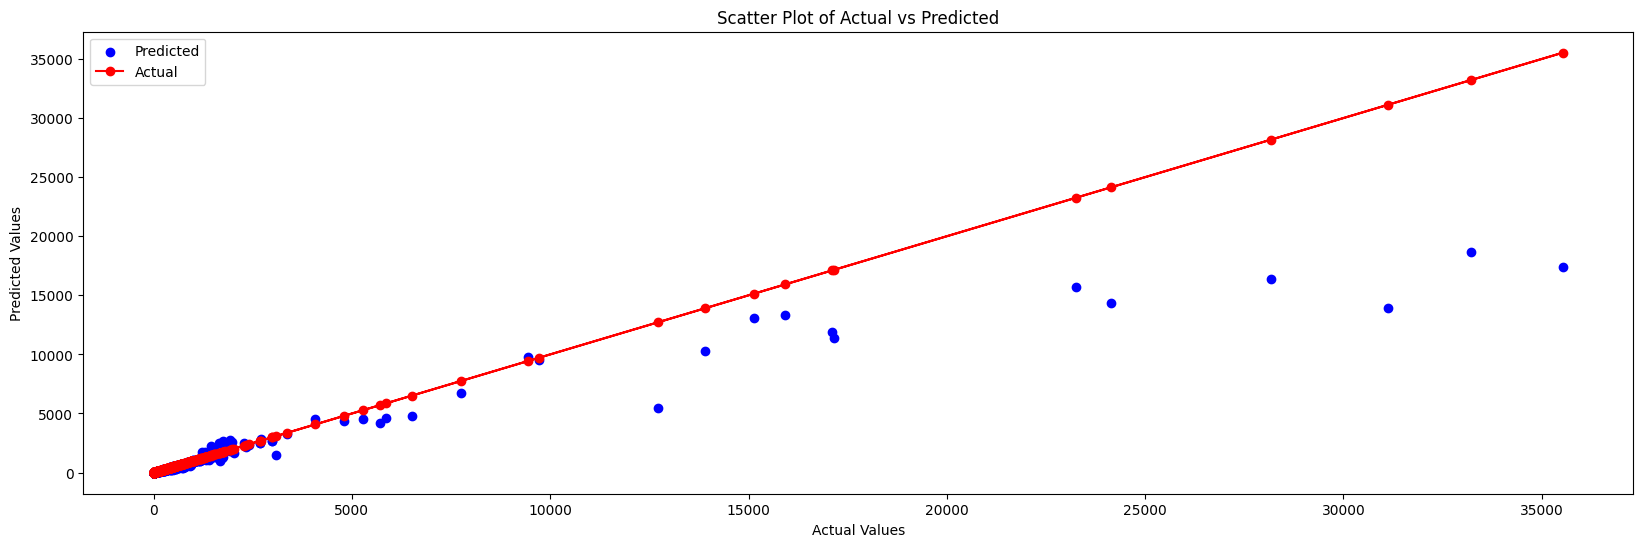

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))  # Adjust figure size as needed
plt.scatter(actual_crime_rates_list, predicted_crime_rates_list, color='blue', label='Predicted')
plt.plot(actual_crime_rates_list, actual_crime_rates_list, color='red',marker='o', label='Actual')  # Plotting a diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted')
plt.legend()
plt.show()



In [87]:
s={'Actual Crime Rate':actual_crime_rates_list,'Predicted Crime Rate' :predicted_crime_rates_list }
p=pd.DataFrame(s)

In [89]:
p.head(20)

,Actual Crime Rate,Predicted Crime Rate
0,952.0,631.747070
1,366.0,347.249390
2,690.0,649.810852
3,1438.0,1273.598022
4,1.0,-2.515227
5,1325.0,1139.515503
6,874.0,783.495667
7,1387.0,1340.713379
8,1719.0,1225.794434
9,1063.0,992.715637
